# Video Game Sales Analysis and Visualization

## [Description](https://www.kaggle.com/gregorut/videogamesales)
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales (in millions)

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('./datasets/video-games-sales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.shape

(16598, 11)

### Missing data

In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.Year

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [7]:
df.Publisher

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

In [8]:
df[df.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [9]:
df.Year.median()

2007.0

Rather than to fill missing values with median, it's probably better to drop them altogether since we're going to display them neatly. Also, 307 rows out of 16598 rows is not that significant

In [10]:
df.dropna(inplace=True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Getting to know each column

**df.Name**

In [12]:
df.Name.value_counts()

Need for Speed: Most Wanted          12
LEGO Marvel Super Heroes              9
FIFA 14                               9
Ratatouille                           9
Cars                                  8
                                     ..
Pandemonium 2                         1
Style Book: Cinnamoroll               1
Maximum Racing: GP Classic Racing     1
Mimana Iyar Chronicle                 1
Rally Cross                           1
Name: Name, Length: 11325, dtype: int64

In [13]:
df.Name.nunique()

11325

In [14]:
df.loc[df.Name=='Ratatouille']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1578,1580,Ratatouille,DS,2007.0,Action,THQ,0.50,0.62,0.0,0.14,1.26
2445,2447,Ratatouille,PS2,2007.0,Action,THQ,0.31,0.00,0.0,0.53,0.85
3029,3031,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.28,0.0,0.16,0.67
3851,3853,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0.0,0.11,0.52
3857,3859,Ratatouille,Wii,2007.0,Action,THQ,0.44,0.04,0.0,0.04,0.52
6383,6385,Ratatouille,X360,2007.0,Action,THQ,0.23,0.02,0.0,0.02,0.27
7703,7705,Ratatouille,GBA,2007.0,Action,THQ,0.14,0.05,0.0,0.00,0.20
9025,9027,Ratatouille,GC,2007.0,Action,THQ,0.11,0.03,0.0,0.00,0.14
14395,14398,Ratatouille,PC,2007.0,Action,THQ,0.01,0.01,0.0,0.00,0.03


In [15]:
df.loc[(df.Name=='Ratatouille') & (df.Global_Sales>0.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1578,1580,Ratatouille,DS,2007.0,Action,THQ,0.50,0.62,0.0,0.14,1.26
2445,2447,Ratatouille,PS2,2007.0,Action,THQ,0.31,0.00,0.0,0.53,0.85
3029,3031,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.28,0.0,0.16,0.67
3851,3853,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0.0,0.11,0.52
3857,3859,Ratatouille,Wii,2007.0,Action,THQ,0.44,0.04,0.0,0.04,0.52


In [16]:
df.loc[(df.Name.str.contains('Mario'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
...,...,...,...,...,...,...,...,...,...,...,...
12373,12375,Mario vs. Donkey Kong: Tipping Stars,3DS,2015.0,Puzzle,Nintendo,0.00,0.00,0.06,0.00,0.06
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
13273,13275,Detective Conan: Marionette Symphony,3DS,2013.0,Adventure,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01


In [17]:
df.loc[(df.Name.str.contains('Mario')) & (df.Name.str.contains('Bros'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
182,183,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2.93,1.25,0.83,0.20,5.20
183,184,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.32,1.30,1.27,0.31,5.19
200,201,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07
573,574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65


In [18]:
df.loc[(df.Name.str.contains('Danganronpa'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4682,4684,Danganronpa: Trigger Happy Havoc,PSV,2013.0,Misc,Nippon Ichi Software,0.14,0.07,0.15,0.06,0.41
6210,6212,Danganronpa Another Episode: Ultra Despair Girls,PSV,2014.0,Action,Nippon Ichi Software,0.10,0.03,0.12,0.04,0.28
6459,6461,Danganronpa 2: Goodbye Despair,PSV,2014.0,Misc,Nippon Ichi Software,0.13,0.07,0.00,0.06,0.26
7760,7762,Danganronpa 2: Goodbye Despair,PSP,2012.0,Misc,Spike,0.00,0.00,0.19,0.00,0.19


In [19]:
df.loc[(df.Name.str.contains('Mario'))].sort_values('Name')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3568,3570,Classic NES Series: Dr. Mario,GBA,2004.0,Puzzle,Nintendo,0.31,0.11,0.13,0.01,0.56
1351,1353,Classic NES Series: Super Mario Bros.,GBA,2004.0,Platform,Nintendo,0.00,0.00,1.39,0.03,1.43
4221,4223,Dance Dance Revolution: Mario Mix,GC,2005.0,Misc,Nintendo,0.36,0.09,0.00,0.01,0.47
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
13273,13275,Detective Conan: Marionette Symphony,3DS,2013.0,Adventure,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...
164,165,Super Mario World,GBA,2001.0,Platform,Nintendo,3.21,1.11,0.95,0.20,5.46
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
492,493,Super Mario World 2: Yoshi's Island,GBA,2002.0,Platform,Nintendo,1.75,0.45,0.62,0.09,2.91
282,283,Super Mario World 2: Yoshi's Island,SNES,1995.0,Platform,Nintendo,1.65,0.61,1.76,0.09,4.12


In [20]:
df.Name.str.contains('Mario Bros').value_counts()

False    16275
True        16
Name: Name, dtype: int64

In [21]:
df.loc[(df.Name.str.contains('Neptunia'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4297,4299,Hyperdimension Neptunia,PS3,2010.0,Role-Playing,Tecmo Koei,0.22,0.11,0.07,0.05,0.46
8101,8103,Hyperdimension Neptunia,PSV,2013.0,Role-Playing,Compile Heart,0.09,0.00,0.07,0.02,0.18
8224,8226,Hyperdimension Neptunia U: Action Unleashed,PSV,2014.0,Action,Idea Factory International,0.07,0.02,0.06,0.03,0.17
8462,8464,Hyperdimension Neptunia Victory,PS3,2012.0,Role-Playing,Compile Heart,0.05,0.03,0.06,0.02,0.16
9361,9363,Hyperdimension Idol Neptunia PP,PSV,2013.0,Misc,Namco Bandai Games,0.04,0.03,0.04,0.02,0.13
9967,9969,Hyperdimension Neptunia Re;Birth 3,PSV,2014.0,Action,Idea Factory International,0.07,0.01,0.00,0.03,0.12
11133,11135,Hyperdimension Neptunia Re;Birth 2,PSV,2014.0,Action,Idea Factory International,0.05,0.02,0.00,0.02,0.09
12193,12195,Hyperdimension Neptunia Victory,PSV,2014.0,Role-Playing,Compile Heart,0.00,0.00,0.07,0.00,0.07
13520,13522,Hyperdimension Neptunia mk2,PSV,2014.0,Action,Compile Heart,0.00,0.00,0.04,0.00,0.04
13854,13856,Hyperdimension Neptunia Victory II,PS4,2015.0,Role-Playing,Idea Factory International,0.00,0.00,0.04,0.00,0.04


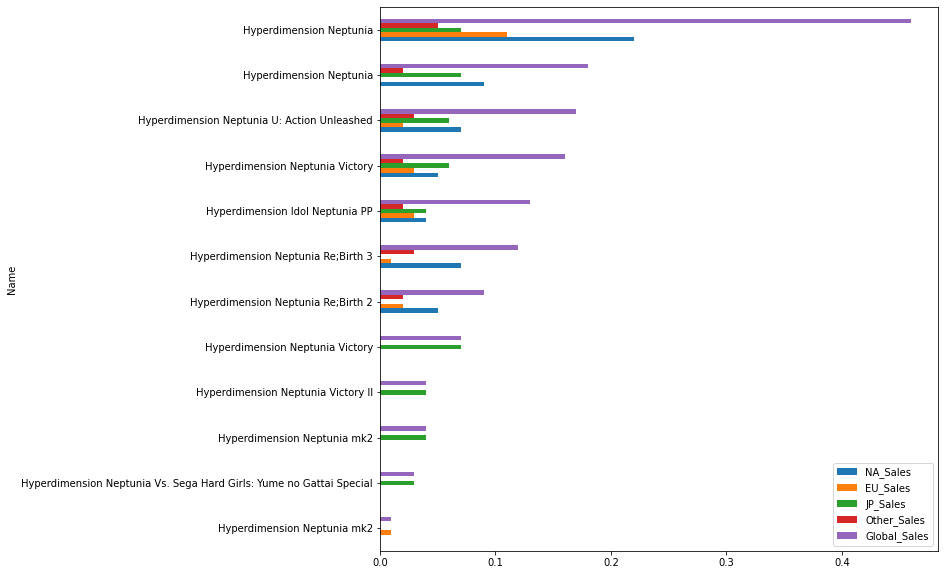

In [99]:
df.loc[(df.Name.str.contains('Neptunia'))].sort_values(
        'Global_Sales', ascending=True).plot(
        x='Name',
        y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
        kind='barh',
        figsize=(10, 10));

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**df.Platform**

In [30]:
df.Platform.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [31]:
df.Platform.nunique()

31

In [33]:
df.loc[(df.Platform=='PC')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
...,...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.0,0.00,0.01
16566,16569,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,0.00,0.0,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.0,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.00,0.01


In [44]:
df.loc[(df.Platform=='PC') & (df.Year>=2000)].nunique()

Rank            898
Name            897
Platform          1
Year             17
Genre            12
Publisher       120
NA_Sales         66
EU_Sales         88
JP_Sales          2
Other_Sales      36
Global_Sales    120
dtype: int64

In [42]:
df.loc[(df.Platform=='PC') & (df.Year<2000)].nunique()

Rank            40
Name            40
Platform         1
Year             9
Genre           10
Publisher       19
NA_Sales        21
EU_Sales        22
JP_Sales         2
Other_Sales     11
Global_Sales    28
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


**df.Year**

In [64]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [65]:
# Remove the .0
df.Year = df.Year.astype(int)
df.Year.value_counts().head()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Year, dtype: int64

In [69]:
df.Year[(df.Global_Sales>20)]

0     2006
1     1985
2     2008
3     2009
4     1996
5     1989
6     2006
7     2006
8     2009
9     1984
10    2005
11    2005
12    1999
13    2007
14    2009
15    2010
16    2013
17    2004
18    1990
19    2005
Name: Year, dtype: int32

In [70]:
df.loc[(df.Year==2006)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16547,16550,Bookworm Deluxe,PC,2006,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01


In [71]:
df.loc[(df.Year==1985)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
374,375,Kung Fu,NES,1985,Action,Nintendo,1.64,0.38,1.42,0.06,3.50
868,870,Soccer,NES,1985,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96
1260,1262,Ice Climber,NES,1985,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50
1490,1492,Gyromite,NES,1985,Puzzle,Nintendo,0.73,0.16,0.40,0.03,1.32
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985,Fighting,Namco Bandai Games,0.00,0.00,1.05,0.00,1.05
2020,2022,Bomberman,NES,1985,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03
2059,2061,1942,NES,1985,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00
2259,2261,Balloon Fight,NES,1985,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92
3907,3909,Wrecking Crew,NES,1985,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51


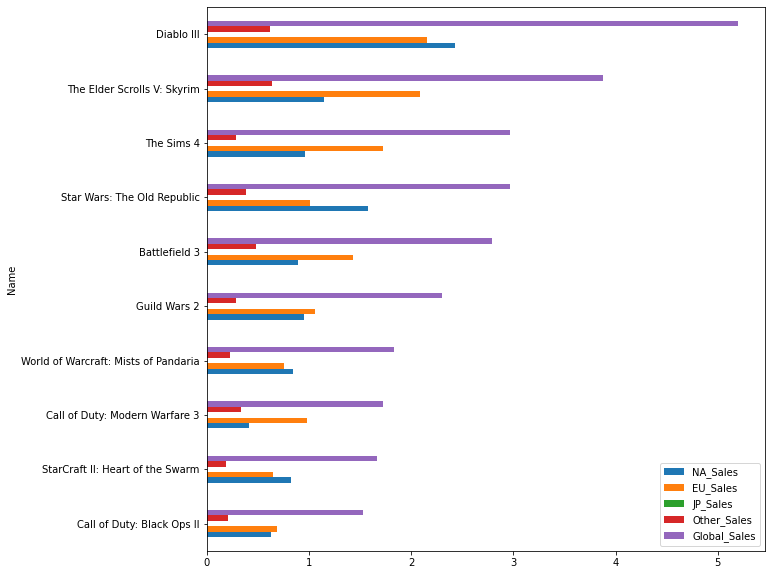

In [102]:
df.loc[(df.Year>2010) & (df.Platform=='PC')][:10].sort_values(
        'Rank', ascending=False).plot(
        x='Name',
        y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
        kind='barh',
        figsize=(10, 10));

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 2.1+ MB


**df.Genre**

In [76]:
df.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [79]:
df.loc[(df.Genre=='Shooter') & (df.Platform=='PC')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
353,354,Doom II: Hell on Earth,PC,1994,Shooter,Virgin Interactive,2.05,1.40,0.00,0.16,3.61
533,534,Battlefield 3,PC,2011,Shooter,Electronic Arts,0.89,1.43,0.00,0.48,2.79
665,667,Half-Life 2,PC,2004,Shooter,Vivendi Games,2.28,0.02,0.08,0.00,2.37
874,876,Star Wars: Dark Forces,PC,1994,Shooter,LucasArts,1.09,0.77,0.00,0.09,1.95
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16433,16436,Clive Barker's Jericho,PC,2007,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16501,16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16577,16580,Damnation,PC,2009,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01


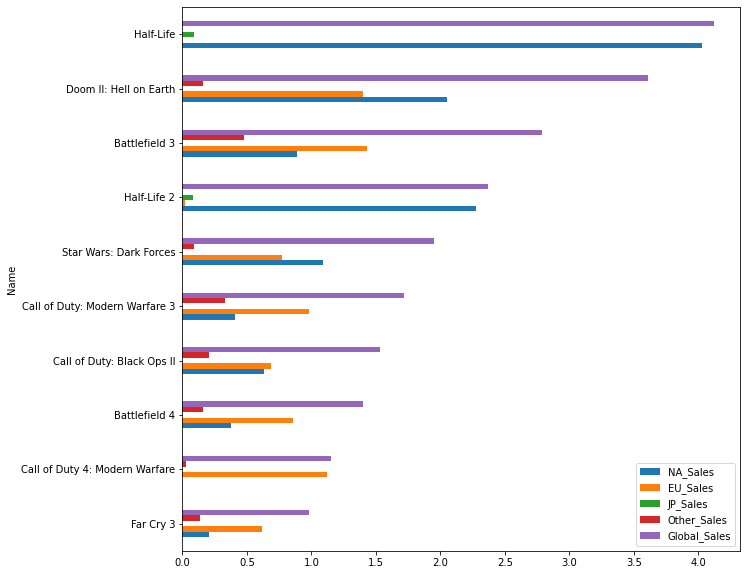

In [95]:
df.loc[(df.Genre=='Shooter') & (df.Platform=='PC')][:10].sort_values(
        'Rank', ascending=False).plot(
        x='Name',
        y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
        kind='barh',
        figsize=(10, 10));

In [98]:
df.loc[(df.Genre=='Shooter') & (df.Platform=='PC')][:20].sort_values(
        'Rank', ascending=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
281,282,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
353,354,Doom II: Hell on Earth,PC,1994,Shooter,Virgin Interactive,2.05,1.40,0.00,0.16,3.61
533,534,Battlefield 3,PC,2011,Shooter,Electronic Arts,0.89,1.43,0.00,0.48,2.79
665,667,Half-Life 2,PC,2004,Shooter,Vivendi Games,2.28,0.02,0.08,0.00,2.37
874,876,Star Wars: Dark Forces,PC,1994,Shooter,LucasArts,1.09,0.77,0.00,0.09,1.95
1037,1039,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,0.41,0.98,0.00,0.33,1.72
1217,1219,Call of Duty: Black Ops II,PC,2012,Shooter,Activision,0.63,0.69,0.00,0.21,1.53
1386,1388,Battlefield 4,PC,2013,Shooter,Electronic Arts,0.38,0.86,0.00,0.16,1.40
1769,1771,Call of Duty 4: Modern Warfare,PC,2007,Shooter,Activision,0.00,1.12,0.00,0.03,1.15
2106,2108,Far Cry 3,PC,2012,Shooter,Ubisoft,0.21,0.62,0.00,0.14,0.98


In [108]:
df.loc[(df.Platform=='PC') & (df.Name.str.contains('Call of Duty'))][:10].sort_values(
        'Rank', ascending=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1037,1039,Call of Duty: Modern Warfare 3,PC,2011,Shooter,Activision,0.41,0.98,0.0,0.33,1.72
1217,1219,Call of Duty: Black Ops II,PC,2012,Shooter,Activision,0.63,0.69,0.0,0.21,1.53
1769,1771,Call of Duty 4: Modern Warfare,PC,2007,Shooter,Activision,0.00,1.12,0.0,0.03,1.15
2347,2349,Call of Duty: Modern Warfare 2,PC,2009,Shooter,Activision,0.01,0.79,0.0,0.09,0.89
2797,2799,Call of Duty: Ghosts,PC,2013,Shooter,Activision,0.23,0.41,0.0,0.09,0.73
4740,4742,Call of Duty: Advanced Warfare,PC,2014,Shooter,Activision,0.14,0.23,0.0,0.04,0.41
7050,7052,Call of Duty: Black Ops 3,PC,2015,Shooter,Activision,0.00,0.22,0.0,0.01,0.23
7949,7951,Call of Duty: World at War,PC,2008,Shooter,Activision,0.02,0.13,0.0,0.03,0.19
12408,12410,Call of Duty 2,PC,2005,Shooter,Activision,0.00,0.05,0.0,0.01,0.06


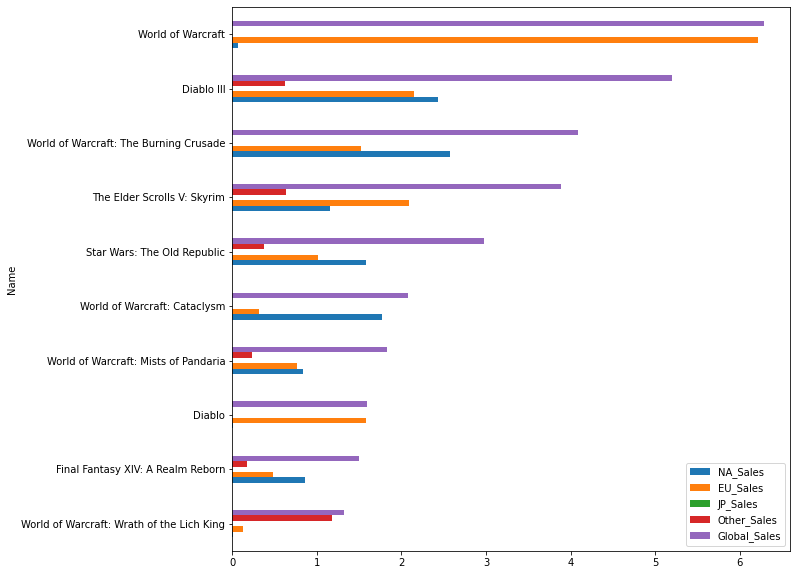

In [101]:
df.loc[(df.Genre=='Role-Playing') & (df.Platform=='PC')][:10].sort_values(
        'Rank', ascending=False).plot(
        x='Name',
        y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
        kind='barh',
        figsize=(10, 10));

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 2.1+ MB


**df.Publisher**

In [110]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Mystique                           1
Square EA                          1
Giga                               1
Masque Publishing                  1
FuRyu Corporation                  1
Name: Publisher, Length: 576, dtype: int64

In [111]:
df.Publisher.nunique()

576

In [116]:
df[:20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [117]:
df.loc[(df.Publisher=='Nintendo')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [119]:
df.loc[(df.Publisher.str.contains('Bethesda'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
75,76,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
126,127,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56
208,209,Fallout 3,X360,2008,Role-Playing,Bethesda Softworks,3.39,1.03,0.09,0.44,4.96
287,288,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
...,...,...,...,...,...,...,...,...,...,...,...
12646,12648,NTRA Breeders' Cup World Thoroughbred Champion...,XB,2005,Simulation,Bethesda Softworks,0.04,0.01,0.00,0.00,0.06
12946,12948,Hunted: The Demon's Forge,PC,2011,Action,Bethesda Softworks,0.03,0.01,0.00,0.01,0.05
14516,14519,Doom 3 BFG Edition,PC,2012,Shooter,Bethesda Softworks,0.00,0.02,0.00,0.01,0.03
15954,15957,IHRA Drag Racing: Sportsman Edition,XB,2006,Racing,Bethesda Softworks,0.01,0.00,0.00,0.00,0.02


In [120]:
df.loc[(df.Name.str.contains('Skyrim'))]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
75,76,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
126,127,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56
310,311,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88


In [124]:
df.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

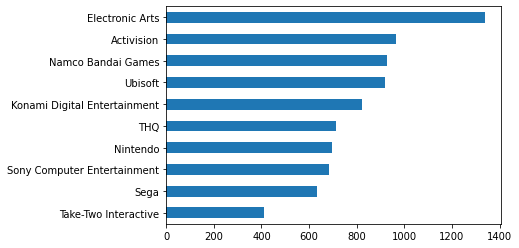

In [137]:
df.Publisher.value_counts().head(10).sort_values(ascending=True).plot(kind='barh');

In [168]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 2.1+ MB


**df_sales**

In [181]:
df.iloc[0, 0:]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

In [188]:
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


In [189]:
df_sales.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [224]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16291 non-null  float64
 1   EU_Sales     16291 non-null  float64
 2   JP_Sales     16291 non-null  float64
 3   Other_Sales  16291 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


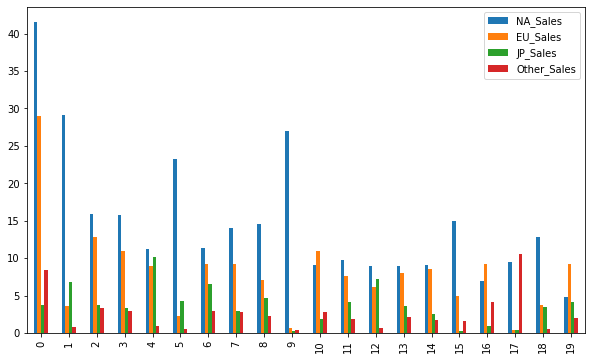

In [200]:
df_sales.drop('Global_Sales', axis=1)[:20].plot(kind='bar', figsize=(10, 6));

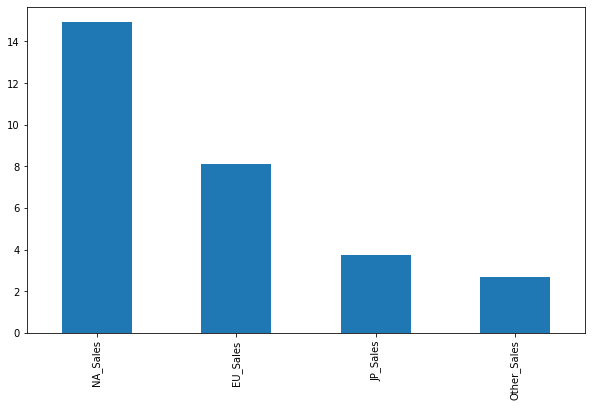

In [207]:
df_sales.drop('Global_Sales', axis=1)[:20].mean().plot(kind='bar', figsize=(10, 6));

In [209]:
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [217]:
df_sales.iloc[:1].sum(axis=1)

0    82.74
dtype: float64

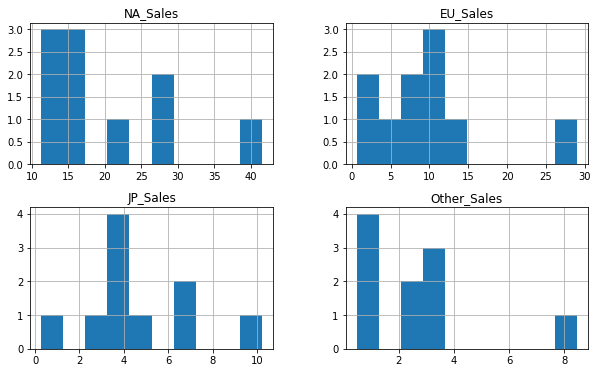

In [220]:
df_sales[:10].hist(figsize=(10, 6));